#MOUNTING MY DRIVE IN THE ENVIRONMENT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/ProAnalytics_G4/dataset_template_req/Insurance Dataset.rar", outdir="/content")

     |████████████████████████████████| 81kB 4.9MB/s 
patool: Extracting /content/drive/MyDrive/ProAnalytics_G4/dataset_template_req/Insurance Dataset.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/ProAnalytics_G4/dataset_template_req/Insurance Dataset.rar"
patool:     with cwd='/content'
patool: ... /content/drive/MyDrive/ProAnalytics_G4/dataset_template_req/Insurance Dataset.rar extracted to `/content'.


'/content'

#IMPORTING LIBRARIES FOR PREPROCESSING


In [3]:
#loading basic libraries for EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###LOADING DATASET AND BASIC INFO 

In [4]:
#Loading dataset in the environment
data= pd.read_csv(r"./Insurance Dataset.csv")

###MAKING COPY OF ORG DATA

In [5]:
data1=data.copy()
data1=data1.drop_duplicates().reset_index(drop=True)

In [6]:
data1.shape

(1043761, 24)

In [7]:
data1.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [8]:
data1.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

###COLUMN 7 NOISE HANDLING

In [9]:
data1.iloc[:,7].unique().shape[0]

120

In [10]:
d1=data1.iloc[:,7].values
d1=[v.replace(" +","") for v in d1]
data1.iloc[:,7]=d1
data1.iloc[:,7].unique().shape[0]

120

In [11]:
data1.iloc[:,7].unique()

array(['4', '3', '1', '2', '5', '6', '14', '12', '9', '8', '10', '7',
       '22', '11', '16', '15', '25', '13', '17', '28', '18', '19', '23',
       '38', '20', '24', '26', '21', '27', '30', '29', '39', '87', '35',
       '37', '32', '55', '56', '49', '110', '69', '75', '42', '51', '47',
       '45', '46', '40', '34', '79', '43', '120', '65', '41', '31', '50',
       '59', '44', '36', '70', '115', '58', '94', '33', '68', '67', '54',
       '80', '85', '95', '78', '91', '88', '48', '52', '63', '57', '74',
       '64', '53', '62', '97', '72', '118', '81', '90', '86', '106',
       '112', '105', '114', '66', '89', '83', '84', '82', '93', '116',
       '71', '60', '73', '61', '92', '76', '96', '77', '104', '100',
       '103', '102', '117', '108', '99', '107', '98', '101', '119', '111',
       '109', '113'], dtype=object)

###DROPPING MISSING, NULL VALUES

In [12]:
data1.dropna(inplace=True)

In [ ]:
percent=(data.shape[0]-data1.shape[0])/data.shape[0]*100
print("% of dropped missing records:",round(percent,3))

% of dropped missing records: 0.697


In [13]:
data1.reset_index(drop=True,inplace=True)
data1.shape

(1041265, 24)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041265 non-null  object 
 1   Hospital County                        1041265 non-null  object 
 2   Hospital Id                            1041265 non-null  float64
 3   Age                                    1041265 non-null  object 
 4   Gender                                 1041265 non-null  object 
 5   Cultural_group                         1041265 non-null  object 
 6   ethnicity                              1041265 non-null  object 
 7   Days_spend_hsptl                       1041265 non-null  object 
 8   Admission_type                         1041265 non-null  object 
 9   Home or self care,                     1041265 non-null  object 
 10  ccs_diagnosis_code                     104

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041265 non-null  object 
 1   Hospital County                        1041265 non-null  object 
 2   Hospital Id                            1041265 non-null  float64
 3   Age                                    1041265 non-null  object 
 4   Gender                                 1041265 non-null  object 
 5   Cultural_group                         1041265 non-null  object 
 6   ethnicity                              1041265 non-null  object 
 7   Days_spend_hsptl                       1041265 non-null  object 
 8   Admission_type                         1041265 non-null  object 
 9   Home or self care,                     1041265 non-null  object 
 10  ccs_diagnosis_code                     104

In [14]:
data2=data1.copy()

In [15]:
data["Surg_Description"].value_counts()

Medical           805729
Surgical          242804
Not Applicable        42
Name: Surg_Description, dtype: int64

In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041265 non-null  object 
 1   Hospital County                        1041265 non-null  object 
 2   Hospital Id                            1041265 non-null  float64
 3   Age                                    1041265 non-null  object 
 4   Gender                                 1041265 non-null  object 
 5   Cultural_group                         1041265 non-null  object 
 6   ethnicity                              1041265 non-null  object 
 7   Days_spend_hsptl                       1041265 non-null  object 
 8   Admission_type                         1041265 non-null  object 
 9   Home or self care,                     1041265 non-null  object 
 10  ccs_diagnosis_code                     104

###DROPPING IRRELEVANT COLUMNS

In [17]:
data2=data1.drop(["Hospital County",'Hospital Id',"Home or self care,","apr_drg_description","ccs_procedure_code","Tot_cost","Tot_charg","Mortality risk"],axis=1)

In [18]:
colname=[data2.columns]
colname


[Index(['Area_Service', 'Age', 'Gender', 'Cultural_group', 'ethnicity',
        'Days_spend_hsptl', 'Admission_type', 'ccs_diagnosis_code',
        'Code_illness', 'Surg_Description', 'Weight_baby', 'Abortion',
        'Emergency dept_yes/No', 'ratio_of_total_costs_to_total_charges',
        'Result', 'Payment_Typology'],
       dtype='object')]

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 16 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041265 non-null  object 
 1   Age                                    1041265 non-null  object 
 2   Gender                                 1041265 non-null  object 
 3   Cultural_group                         1041265 non-null  object 
 4   ethnicity                              1041265 non-null  object 
 5   Days_spend_hsptl                       1041265 non-null  object 
 6   Admission_type                         1041265 non-null  object 
 7   ccs_diagnosis_code                     1041265 non-null  int64  
 8   Code_illness                           1041265 non-null  int64  
 9   Surg_Description                       1041265 non-null  object 
 10  Weight_baby                            104

In [20]:
data2["Days_spend_hsptl"]=data2["Days_spend_hsptl"].astype("int64")

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 16 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041265 non-null  object 
 1   Age                                    1041265 non-null  object 
 2   Gender                                 1041265 non-null  object 
 3   Cultural_group                         1041265 non-null  object 
 4   ethnicity                              1041265 non-null  object 
 5   Days_spend_hsptl                       1041265 non-null  int64  
 6   Admission_type                         1041265 non-null  object 
 7   ccs_diagnosis_code                     1041265 non-null  int64  
 8   Code_illness                           1041265 non-null  int64  
 9   Surg_Description                       1041265 non-null  object 
 10  Weight_baby                            104

###DIVIDING DATASET TO CATEGORICAL AND NUMERICAL 

In [23]:
#placing the whole dataset into categorical and numerical for ease of operation
categ= data2.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13,15]]
num=data2.iloc[:,[5,10,15]]

###ENCODING CATEGORICAL FEATURES

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data2.iloc[:,1].dtype

dtype('O')

In [25]:
categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 14 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041265 non-null  object 
 1   Age                                    1041265 non-null  object 
 2   Gender                                 1041265 non-null  object 
 3   Cultural_group                         1041265 non-null  object 
 4   ethnicity                              1041265 non-null  object 
 5   Admission_type                         1041265 non-null  object 
 6   ccs_diagnosis_code                     1041265 non-null  int64  
 7   Code_illness                           1041265 non-null  int64  
 8   Surg_Description                       1041265 non-null  object 
 9   Weight_baby                            1041265 non-null  int64  
 10  Abortion                               104

In [26]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype
---  ------            --------------    -----
 0   Days_spend_hsptl  1041265 non-null  int64
 1   Weight_baby       1041265 non-null  int64
 2   Payment_Typology  1041265 non-null  int64
dtypes: int64(3)
memory usage: 23.8 MB


In [27]:
for i in range(categ.shape[1]):
  if (categ.iloc[:,i].dtype=="object"):
    categ.iloc[:,i] = labelencoder.fit_transform(categ.iloc[:,i])


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [28]:
categ.head()

,Area_Service,Age,Gender,Cultural_group,ethnicity,Admission_type,ccs_diagnosis_code,Code_illness,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,ratio_of_total_costs_to_total_charges,Payment_Typology
0,6,2,0,3,0,0,122,1,0,0,0,1,1.012798,1
1,6,4,0,3,0,5,197,3,0,0,0,1,1.079365,1
2,6,2,0,3,0,5,122,1,0,0,0,1,1.059379,1
3,6,0,0,3,0,5,122,1,0,0,0,1,1.484167,1
4,6,4,0,3,0,0,122,2,0,0,0,1,0.986161,1


###CHECKING CORRELATION IN NUMERICAL DATA

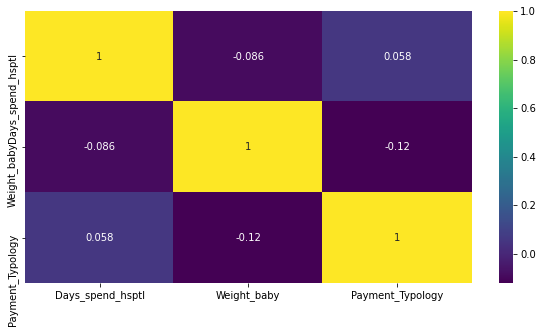

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(num.corr(), annot=True,  cmap= 'viridis')

###CHECKING CORRELATION IN CATEGORICAL DATA

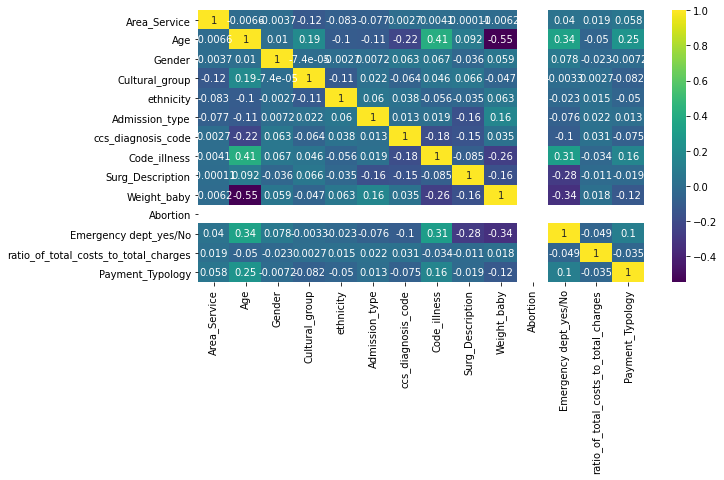

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(categ.corr(), annot=True, cmap= 'viridis')


###SCALING NUMERICAL BY ROBUSTSCALER AND CATEGORICAL BY MINMAXSCALER

In [31]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler

In [32]:
num.head()
numcolname=list(num.columns)
categcolname=list(categ.columns)

In [33]:
scaler=MinMaxScaler()
scaler1=RobustScaler()

In [34]:
#for transforming data
categ=pd.DataFrame(scaler.fit_transform(categ))
num=pd.DataFrame(scaler1.fit_transform(num))



In [35]:
processed_data=pd.concat([num, categ] , axis=1)

In [43]:
processed_data.head()

,I0,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,I17,Result
0,0.25,0.0,-0.5,1.0,0.5,0.0,1.0,0.0,0.0,0.180867,0.000000,0.0,0.0,0.0,1.0,0.006219,0.0,1,1
1,0.25,0.0,-0.5,1.0,1.0,0.0,1.0,0.0,1.0,0.292975,0.666667,0.0,0.0,0.0,1.0,0.006642,0.0,1,1
2,0.00,0.0,-0.5,1.0,0.5,0.0,1.0,0.0,1.0,0.180867,0.000000,0.0,0.0,0.0,1.0,0.006515,0.0,1,1
3,-0.50,0.0,-0.5,1.0,0.0,0.0,1.0,0.0,1.0,0.180867,0.000000,0.0,0.0,0.0,1.0,0.009211,0.0,0,0
4,0.00,0.0,-0.5,1.0,1.0,0.0,1.0,0.0,0.0,0.180867,0.333333,0.0,0.0,0.0,1.0,0.006050,0.0,1,1


In [37]:
processed_data.columns=numcolname+categcolname

In [38]:
processed_data["Result"]=data2.Result

### CONCAT NUM AND CATEG DATA AND ADD TARGET VARIABLE 
### SAVE PROCESSED DATASET FOR MODEL BUILDING
### RENAMING COLUMNS AS REFERENCE NOS 

In [39]:
processed_data.columns=["I"+str(i) for i in range(processed_data.shape[1])]

In [40]:
processed_data.columns

Index(['I0', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
       'I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I17'],
      dtype='object')

In [47]:
processed_data.drop(["Result"],inplace=True,axis=1) #extra column of Result dropped 

In [46]:
processed_data.head()

,I0,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,I17,Result
0,0.25,0.0,-0.5,1.0,0.5,0.0,1.0,0.0,0.0,0.180867,0.000000,0.0,0.0,0.0,1.0,0.006219,0.0,1,1
1,0.25,0.0,-0.5,1.0,1.0,0.0,1.0,0.0,1.0,0.292975,0.666667,0.0,0.0,0.0,1.0,0.006642,0.0,1,1
2,0.00,0.0,-0.5,1.0,0.5,0.0,1.0,0.0,1.0,0.180867,0.000000,0.0,0.0,0.0,1.0,0.006515,0.0,1,1
3,-0.50,0.0,-0.5,1.0,0.0,0.0,1.0,0.0,1.0,0.180867,0.000000,0.0,0.0,0.0,1.0,0.009211,0.0,0,0
4,0.00,0.0,-0.5,1.0,1.0,0.0,1.0,0.0,0.0,0.180867,0.333333,0.0,0.0,0.0,1.0,0.006050,0.0,1,1


In [70]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 18 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   I0      1041265 non-null  float64
 1   I1      1041265 non-null  float64
 2   I2      1041265 non-null  float64
 3   I3      1041265 non-null  float64
 4   I4      1041265 non-null  float64
 5   I5      1041265 non-null  float64
 6   I6      1041265 non-null  float64
 7   I7      1041265 non-null  float64
 8   I8      1041265 non-null  float64
 9   I9      1041265 non-null  float64
 10  I10     1041265 non-null  float64
 11  I11     1041265 non-null  float64
 12  I12     1041265 non-null  float64
 13  I13     1041265 non-null  float64
 14  I14     1041265 non-null  float64
 15  I15     1041265 non-null  float64
 16  I16     1041265 non-null  float64
 17  I17     1041265 non-null  int64  
dtypes: float64(17), int64(1)
memory usage: 143.0 MB


In [49]:
predictors=list(processed_data.columns)
target=predictors.pop(17)
target


'I17'

In [ ]:
predictors

['I0',
 'I1',
 'I2',
 'I3',
 'I4',
 'I5',
 'I6',
 'I7',
 'I8',
 'I9',
 'I10',
 'I11',
 'I12',
 'I13',
 'I14',
 'I15',
 'I16',
 'I17']

In [ ]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 18 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   I0      1041265 non-null  float64
 1   I1      1041265 non-null  float64
 2   I2      1041265 non-null  float64
 3   I3      1041265 non-null  float64
 4   I4      1041265 non-null  float64
 5   I5      1041265 non-null  float64
 6   I6      1041265 non-null  float64
 7   I7      1041265 non-null  float64
 8   I8      1041265 non-null  float64
 9   I9      1041265 non-null  float64
 10  I10     1041265 non-null  float64
 11  I11     1041265 non-null  float64
 12  I12     1041265 non-null  float64
 13  I13     1041265 non-null  float64
 14  I14     1041265 non-null  float64
 15  I15     1041265 non-null  float64
 16  I16     1041265 non-null  float64
 17  I17     1041265 non-null  int64  
dtypes: float64(17), int64(1)
memory usage: 143.0 MB


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(processed_data.iloc[:,0:16],processed_data.iloc[:,17],
                                                    test_size=0.4, random_state=10)

In [71]:

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((624759, 16), (624759,), (416506, 16), (416506,))

In [52]:
x_train.head()

,I0,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15
976274,0.50,0.0,-0.5,0.666667,0.00,0.5,0.0,0.5,0.2,0.122571,0.666667,0.0,0.0,0.0,1.0,0.005046
409978,2.75,0.0,0.0,0.166667,0.75,0.5,1.0,0.0,0.2,0.343797,0.666667,0.0,0.0,0.0,1.0,0.003229
168795,1.25,0.0,0.5,1.000000,1.00,0.0,1.0,0.0,0.2,0.304933,1.000000,0.0,0.0,0.0,1.0,0.003286
334906,-0.50,0.0,-0.5,0.166667,0.75,0.0,1.0,1.0,0.2,0.983558,0.333333,0.0,0.0,0.0,0.0,0.003667
272396,1.75,0.0,0.0,0.333333,0.75,0.0,1.0,0.0,0.2,0.221226,0.666667,1.0,0.0,0.0,1.0,0.003807


In [53]:
from xgboost import XGBClassifier
model= XGBClassifier()
model.fit(x_train,y_train)
result = model.score(x_test, y_test)
print(result)

0.7490024153313518


In [54]:
score=model.feature_importances_
print(score)

[0.08817075 0.0559766  0.0925625  0.06626782 0.07869938 0.08244728
 0.07100014 0.0582155  0.06755047 0.07614566 0.05749238 0.
 0.         0.         0.11513454 0.09033698]


In [57]:
result = model.score(x_test, y_test)
print(result)

0.7490024153313518


In [58]:
y_pred=model.predict(x_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.20      0.00         5
           1       1.00      0.75      0.86    416501

    accuracy                           0.75    416506
   macro avg       0.50      0.47      0.43    416506
weighted avg       1.00      0.75      0.86    416506



In [60]:
pd.Series(y_pred).value_counts()

1    416501
0         5
dtype: int64

In [ ]:
print(result)

0.7489303875574421


In [61]:
#Result
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression(max_iter=700)
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=700,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
model.score(x_test,y_test)

0.7490096181087428

In [63]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 5)
x_train_res, y_train_res = sm.fit_sample(x_train,y_train)

x_test_res,y_test_res = sm.fit_sample(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [64]:
x_train_res.shape,y_train_res.shape, x_test_res.shape,y_test_res.shape

((936788, 16), (936788,), (623934, 16), (623934,))

In [65]:
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression(max_iter=500)
model.fit(x_train_res,y_train_res)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
model.score(x_test_res,y_test_res)

0.5018367327313465

In [67]:
from xgboost import XGBClassifier
model= XGBClassifier()
model.fit(x_train_res,y_train_res)
print(model.score(x_test_res,y_test_res))

0.6772366949068331


In [68]:
y_pred=model.predict(x_test_res)

In [69]:
print(classification_report(y_pred,y_test_res))

              precision    recall  f1-score   support

           0       0.50      0.77      0.61    204062
           1       0.85      0.63      0.72    419872

    accuracy                           0.68    623934
   macro avg       0.68      0.70      0.67    623934
weighted avg       0.74      0.68      0.69    623934



# FEATURE SELECTION PROCESS


In [73]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas as pd
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
processed_data.to_csv(r"./processed_data.csv")


In [74]:
data=pd.read_csv(r"./processed_data.csv")

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 19 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1041265 non-null  int64  
 1   I0          1041265 non-null  float64
 2   I1          1041265 non-null  float64
 3   I2          1041265 non-null  float64
 4   I3          1041265 non-null  float64
 5   I4          1041265 non-null  float64
 6   I5          1041265 non-null  float64
 7   I6          1041265 non-null  float64
 8   I7          1041265 non-null  float64
 9   I8          1041265 non-null  float64
 10  I9          1041265 non-null  float64
 11  I10         1041265 non-null  float64
 12  I11         1041265 non-null  float64
 13  I12         1041265 non-null  float64
 14  I13         1041265 non-null  float64
 15  I14         1041265 non-null  float64
 16  I15         1041265 non-null  float64
 17  I16         1041265 non-null  float64
 18  I17         1041265 no

In [77]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 18 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   I0      1041265 non-null  float64
 1   I1      1041265 non-null  float64
 2   I2      1041265 non-null  float64
 3   I3      1041265 non-null  float64
 4   I4      1041265 non-null  float64
 5   I5      1041265 non-null  float64
 6   I6      1041265 non-null  float64
 7   I7      1041265 non-null  float64
 8   I8      1041265 non-null  float64
 9   I9      1041265 non-null  float64
 10  I10     1041265 non-null  float64
 11  I11     1041265 non-null  float64
 12  I12     1041265 non-null  float64
 13  I13     1041265 non-null  float64
 14  I14     1041265 non-null  float64
 15  I15     1041265 non-null  float64
 16  I16     1041265 non-null  float64
 17  I17     1041265 non-null  int64  
dtypes: float64(17), int64(1)
memory usage: 143.0 MB


In [79]:
predictors=list(processed_data.columns)
target=predictors.pop(17)
target

'I17'

In [80]:
array = processed_data[predictors].values

In [81]:
array.shape

(1041265, 17)

In [82]:
X = array
Y = processed_data[target].values
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
features = fit.transform(X)
print(fit.scores_)

ValueError: ignored

In [ ]:
Y = np.round(fit.scores_,2) 

array([0.14, 0.77, 0.  , 0.02, 1.14, 0.06, 0.62, 0.02, 1.17, 2.77, 3.32,
        nan, 0.  , 0.3 ])

In [ ]:
X= processed_data[predictors].columns

Index(['Hospital Id', 'Age', 'Gender', 'Cultural_group', 'ethnicity',
       'Days_spend_hsptl', 'Admission_type', 'ccs_diagnosis_code',
       'Code_illness', 'Mortality risk', 'Surg_Description', 'Abortion',
       'ratio_of_total_costs_to_total_charges', 'Payment_Typology'],
      dtype='object')

In [ ]:
Feat_imp1=pd.DataFrame(columns=["Features","Importance"])
Feat_imp1["Features"]=pd.Series(X)
Feat_imp1["Importance"]=pd.Series(Y)

In [ ]:
# Feature Extraction with RFE
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=400)
model.fit(X,Y)
rfe = RFE(model,10)
fit = rfe.fit(X, Y)

In [ ]:
# Feature Ranking:
fit.ranking_

array([1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 5, 2, 1])

In [ ]:
processed_data[predictors].columns

Index(['Hospital Id', 'Age', 'Gender', 'Cultural_group', 'ethnicity',
       'Days_spend_hsptl', 'Admission_type', 'ccs_diagnosis_code',
       'Code_illness', 'Mortality risk', 'Surg_Description', 'Abortion',
       'ratio_of_total_costs_to_total_charges', 'Payment_Typology'],
      dtype='object')

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.083 0.036 0.032 0.021 0.012 0.108 0.024 0.133 0.043 0.028 0.001 0.
 0.439 0.039]


In [ ]:
Y=model.feature_importances_

In [ ]:
X=processed_data[predictors].columns

Index(['Hospital Id', 'Age', 'Gender', 'Cultural_group', 'ethnicity',
       'Days_spend_hsptl', 'Admission_type', 'ccs_diagnosis_code',
       'Code_illness', 'Mortality risk', 'Surg_Description', 'Abortion',
       'ratio_of_total_costs_to_total_charges', 'Payment_Typology'],
      dtype='object')

In [ ]:
Feat_imp2=pd.DataFrame(columns=["Features","Importance"])
Feat_imp2["Features"]=pd.Series(X)
Feat_imp2["Importance"]=pd.Series(Y)